# Jupyter NoteBook으로 작성된 파일 AICentro로 학습하기
* AICentro v2 기준임.

## 절차

### I. 코딩
### II-a. 서비스로 사용위해 .py 파일로 변환(짧지만 간단한 방식)

### 1. Export
* File메뉴 → Export Notebook As... → Export Notebook to Executable Script 
* 다운로드 받은 파일 업로드

### II-b 서비스로 사용위해 .py 파일로 변환(좀 길지만 확실한 방식)
* 위 방법 안되면 아래 절차로...

#### 1. 코드화 시키기
* 아래 모든 코드 선택 : esc → 아래화살표 → (shfit+아래화살표) * n → shift+m

#### 2. 코드 복사 
* 합쳐진 코드 모두 선택 : enter → ctl+a → ctl+c

#### 3. Python 파일 생성
* File메뉴 → new → Text File

#### 4. 코드 붙여 넣기
* ctl+v

#### 5. 저장하고 파일명 적당히 바꾸기
* File Browser 열기(shift+ctl+f) → 생성된 파일에 마우스 오른쪽 버튼 → Rename → 파일명 변경(ex, train.py ) 

### III. 모델 학습
#### 1. AICentro 관리창에서 "+전문가 모드 생성"
#### 2. 학습 작업명 입력
#### 3. 실행파일에서 "파일선택" (위 5번의 파일 선택)
#### 4. 시스템 자원 선택과 학습환경 선택를 선택
#### 5. 생성

### IV. 진행중 모니터링
* 화면 오른쪽위 "상세" 클릭해서 기본보기와 로그보기 가능함. 

### V. 모델 저장
* Train성공하면 모델학습 상세 화면에 "모델 저장"버튼이 생김.

### VI. 출시준비 
* "출시 준비"탭에서 학습된 모델 선택 후 "서비스 검증"버튼 클릭


### VII. 서비스 검증
1. 기본정보
   - 실행파일 : app.py
   - 검증환경 : 2.2.0
2. 배포
3. 테스트
  - Method : POST
  - 미선택 : https://service.aicentro.ai/v2/
  - Request :
    ```
          {"inputs":[[5.1 ,        3.5 ,         1.4  ,       0.2] ]}
    ```
- cf)
    ```
          {"inputs":[[7.0  ,       3.2 ,         4.7  ,       1.4] ]}
    ```


# 주의할 점
* Upload 혹은 저장시 workspace 이하 폴더에 저장할 것. 
* 코드에서 Shell명령이라 메직펑션 제거.(!혹은 %로 시작하는 모든 줄 주석처리 혹은 제거)
* Datafile은 /aihub/data 이하 폴더 가져도 놓고 코드의 path는 /data로 시작해야 함. 
    - Jupyter에서 접근하는 파일 Path : /aihub/data/iris.csv
    - AICentro의 모델 학습시 파일 Path : /data/iris.csv


# ---- << 이하 적용 대상 코드 >>-------------

# SACP AI 포탈과 연계를 위한 기본 객체 생성

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from aicentro.session import Session
session = Session(verify=False)

# AI 포탈과 연계를 위한 기본 객체 생성

In [82]:
from aicentro.session import Session
session = Session(verify=False)
from aicentro.framework.framework import AutomlFramework

# 학습 모델 개발 시 프레임워크별 객체 사용

In [83]:
from aicentro.framework.keras import Keras as SacpFrm
framework = SacpFrm(session=session)

# 모델 코드 작성

In [84]:
batch_size = 50
num_classes = 3
epochs = 200

In [85]:
import pandas as pd
iris=pd.read_csv("../data/iris.csv")
iris.drop(['no'],1,inplace=True)
iriss=iris.sample(frac=1).reset_index(drop=True)
iriss.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,7.4,2.8,6.1,1.9,virginica
1,5.1,3.7,1.5,0.4,setosa
2,5.1,3.8,1.5,0.3,setosa
3,6.4,2.8,5.6,2.2,virginica
4,6.3,3.3,6.0,2.5,virginica


In [88]:
# Shuffling
iriss=iris.sample(frac=1).reset_index(drop=True)
iris_train=iriss.iloc[0:100,:]
iris_test=iriss.iloc[100:150,:]

x_train=iris_train.iloc[:,0:4].values
x_test=iris_test.iloc[:,0:4].values
y_train=iris_train.iloc[:,4:5]
y_test= iris_test.iloc[:,4:5]
# encoder={k:v for v,k in enumerate(y_train.drop_duplicates())}
# encoder
sets=iris.iloc[:,4:5].drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_train=[ encoder[i] for i in y_train["Species"].tolist() ]
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test=[ encoder[i] for i in y_test["Species"].tolist() ]
y_test = keras.utils.to_categorical(y_test, num_classes)

In [90]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4,)))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


# 모델 학습 시 Accuracy 와 Loss 값을 SACP AI 포탈로 전송하여 UI 상에 노출
제공된 Metric Callback 사용 

In [91]:
history = framework.get_metric_callback()

model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[history])


Epoch 1/200
2/2 [==============================] - 0s 119ms/step - loss: 1.3797 - accuracy: 0.3400 - val_loss: 1.3011 - val_accuracy: 0.3200
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 1.3084 - accuracy: 0.3400 - val_loss: 1.2613 - val_accuracy: 0.3200
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2678 - accuracy: 0.3400 - val_loss: 1.2307 - val_accuracy: 0.3200
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 1.2345 - accuracy: 0.3400 - val_loss: 1.2015 - val_accuracy: 0.3200
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 1.1959 - accuracy: 0.3400 - val_loss: 1.1667 - val_accuracy: 0.3200
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1565 - accuracy: 0.3400 - val_loss: 1.1417 - val_accuracy: 0.3200
Epoch 7/200
2/2 [==============================] - 0s 24ms/step - loss: 1.1325 - accuracy: 0.3400 - val_loss: 1.1277 - val_accuracy: 0.3200
Epoch 8/200
2/2 [==

In [92]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18321828544139862
Test accuracy: 0.9800000190734863


# 모델 학습 후 결과를 저장하고 해당 결과를 UI 상에 노출


In [93]:
#model.predict(x_test)
y_test_pred = model.predict(x_test, batch_size=128, verbose=1)

y_label = sets

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

In [97]:
arc = AutomlFramework()
arc.make_expert_acc_loss_chart(history.metrics)
arc.make_multiLabel_roc_curve(y_test_pred, y_test, 'input_name', y_label)
arc.make_confusion_matrix(y_test_pred, y_test, 'input_name', y_label)
framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)


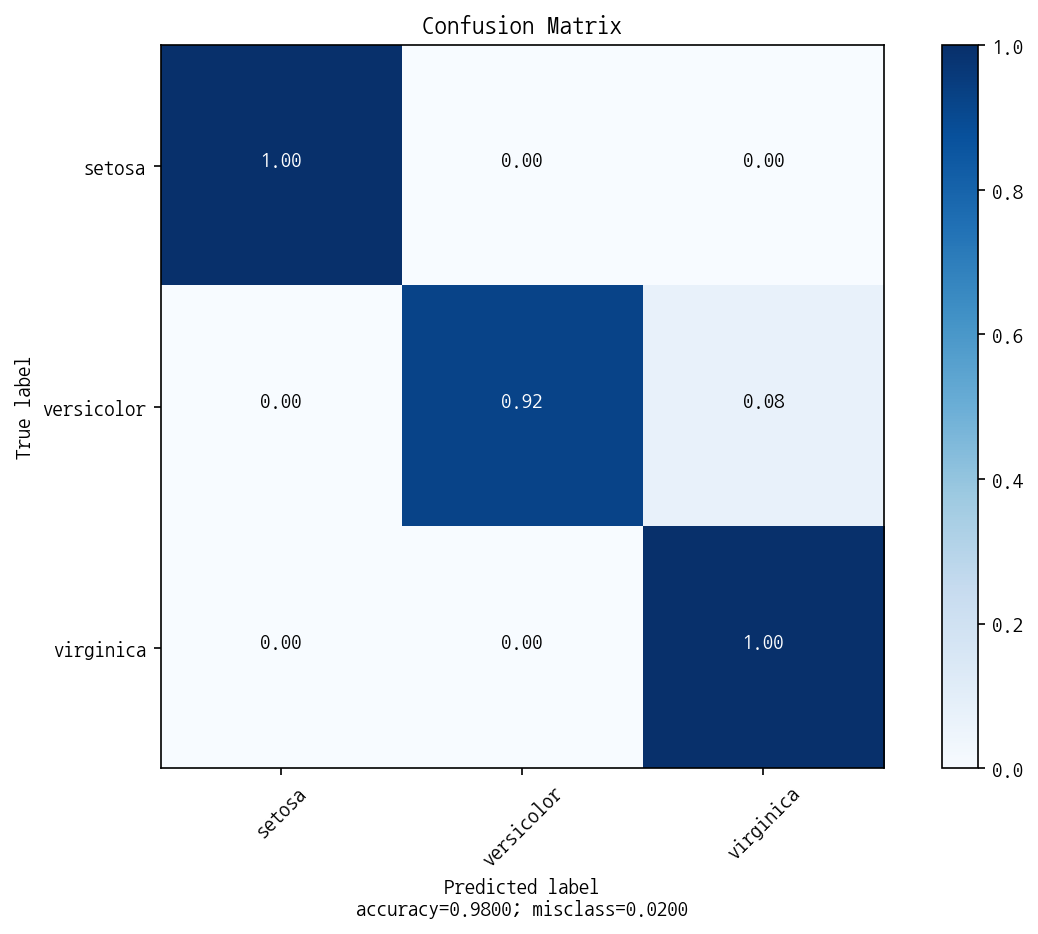

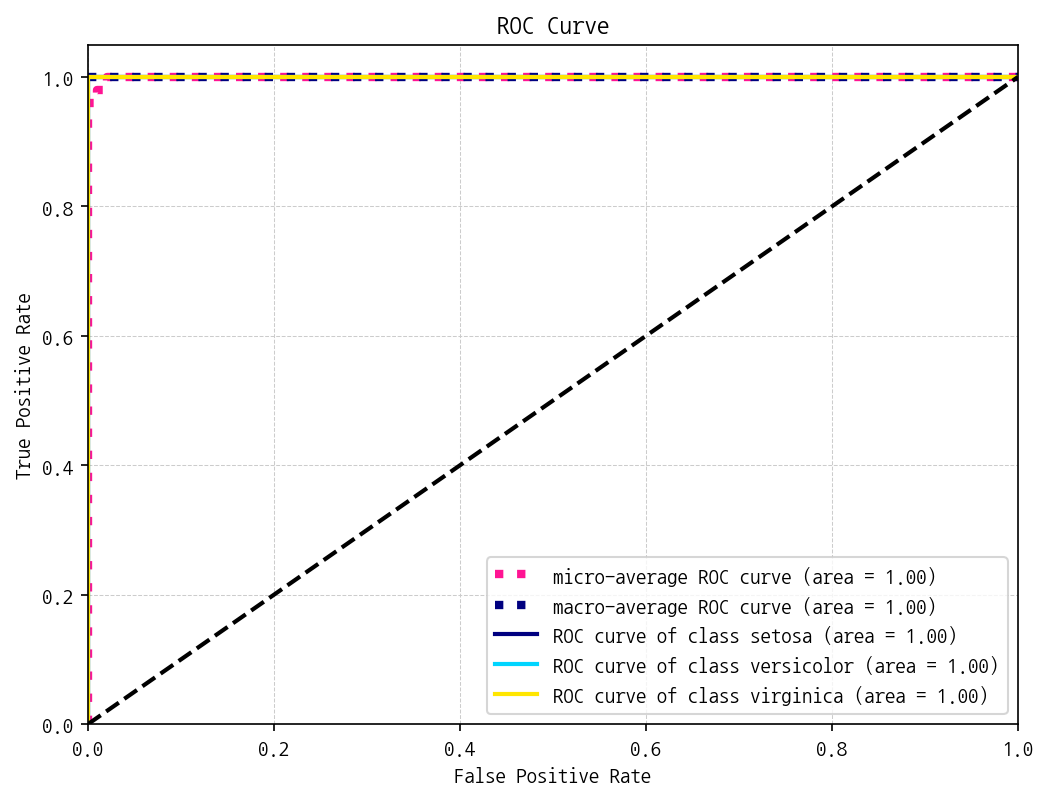

In [98]:
framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')


framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)

framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)


# 학습된 모델 저장

In [33]:
framework.save_model(model, model_name='iris-classification-study')
